In [1]:
import os

os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"
device = "cuda:4"
sd_version = "runwayml/stable-diffusion-v1-5"

In [4]:
import torch

from diffusers import LEditsPPPipelineStableDiffusion
from diffusers.utils import load_image

pipe = LEditsPPPipelineStableDiffusion.from_pretrained(
    sd_version, torch_dtype=torch.float16
).to(device)

img_url = "cherry_blossom.png"
image = load_image(img_url).convert("RGB").resize((512, 512))

_ = pipe.invert(image=image, num_inversion_steps=50, skip=0.1)

edited_image = pipe(
    editing_prompt=["cherry blossom"], edit_guidance_scale=10.0, edit_threshold=0.75
).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

This pipeline only supports DDIMScheduler and DPMSolverMultistepScheduler. The scheduler has been changed to DPMSolverMultistepScheduler.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

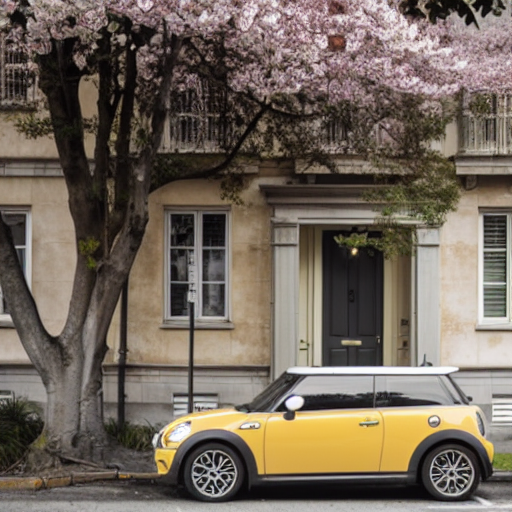

In [5]:
edited_image